<a href="https://colab.research.google.com/github/sushantkumar-estech/NewYorkCity-Taxi-Fares-prediction-using-Neural-Network-with-Pytorch/blob/master/NYC_TaxiFares_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(torch.__version__)

1.6.0+cu101


In [3]:
# Mounting the drive with colab notebook
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
#df = pd.read_csv('D:\Machine Learning_Udemy\9. PyTorch for Deep Learning with Python Bootcamp\Data/NYCTaxiFares.csv')

In [5]:
df = pd.read_csv('/content/drive/My Drive/ML_Dataset/Pytorch_dataset/NYCTaxiFares.csv')

In [6]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [7]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [8]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [9]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [10]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [11]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [13]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [15]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [16]:
df['pickup_datetime'].head()

0   2010-04-19 08:17:56+00:00
1   2010-04-17 15:43:53+00:00
2   2010-04-17 11:23:26+00:00
3   2010-04-11 21:25:03+00:00
4   2010-04-17 02:19:01+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [17]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours = 4)

In [18]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00


In [19]:
df['Hour'] = df['EDTdate'].dt.hour

In [20]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22


In [21]:
df['AMorPM'] = np.where(df['Hour']<12, 'am','pm')

In [22]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [23]:
df['Weekday'] = df['EDTdate'].dt.strftime('%a')

In [24]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [25]:
# Now Dealing with categorical data

In [26]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']

In [27]:
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']

In [28]:
y_col = ['fare_amount']

In [29]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [30]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [31]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [32]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [33]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): [am, pm]

In [34]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]

In [35]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [36]:
df['AMorPM'].cat.codes

0         0
1         0
2         0
3         1
4         1
         ..
119995    0
119996    0
119997    1
119998    0
119999    1
Length: 120000, dtype: int8

In [37]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [38]:
df['Weekday'].cat.codes

0         1
1         2
2         2
3         3
4         0
         ..
119995    3
119996    0
119997    3
119998    5
119999    2
Length: 120000, dtype: int8

In [39]:
df['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [40]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [41]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [42]:
cats = np.stack([hr,ampm,wkdy],axis=1)

In [43]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [44]:
# all that which we performed earlier can be done with the following line of code
# cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)

In [45]:
cats = torch.tensor(cats, dtype=torch.int64)

In [46]:
cats.dtype

torch.int64

In [47]:
#Convert continuous variable to a tensor
conts = np.stack([df[col].values for col in cont_cols], axis=1)
conts = torch.tensor(conts,dtype=torch.float)

In [48]:
conts

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        ...,
        [ 40.7498, -73.9886,  40.7078, -74.0115,   3.0000,   5.0525],
        [ 40.7245, -74.0044,  40.7308, -73.9927,   1.0000,   1.2089],
        [ 40.7719, -73.9554,  40.7630, -73.9676,   3.0000,   1.4274]])

In [49]:
cont = torch.tensor(conts,dtype=torch.float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [50]:
y = torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1,1)

In [51]:
cats.shape

torch.Size([120000, 3])

In [52]:
cont.shape

torch.Size([120000, 6])

In [53]:
y.shape

torch.Size([120000, 1])

In [54]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [55]:
cat_szs

[24, 2, 7]

In [56]:
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]

In [57]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [58]:
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [59]:
catz = cats[:2]

In [60]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [61]:
[nn.Embedding(ni,nf) for ni,nf in emb_szs]

[Embedding(24, 12), Embedding(2, 1), Embedding(7, 4)]

In [62]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])

In [63]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [64]:
# FORWARD METHOD (cats)
embeddingz = []

for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [65]:
embeddingz

[tensor([[-0.3506, -0.5014, -0.8230, -0.2871,  0.1180, -1.0642, -2.3252,  0.4848,
           2.1472, -2.2613, -0.5501,  1.2561],
         [ 0.0300, -0.0727, -0.1020,  0.6507, -0.7283, -1.0667,  0.0495,  0.8495,
          -0.1398,  1.5570, -0.9067, -1.5800]], grad_fn=<EmbeddingBackward>),
 tensor([[1.3155],
         [1.3155]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.6535, -1.9144, -0.5806, -2.2333],
         [ 0.7545, -0.6248,  0.2355,  1.5534]], grad_fn=<EmbeddingBackward>)]

In [66]:
z = torch.cat(embeddingz,1)

In [67]:
z

tensor([[-0.3506, -0.5014, -0.8230, -0.2871,  0.1180, -1.0642, -2.3252,  0.4848,
          2.1472, -2.2613, -0.5501,  1.2561,  1.3155, -0.6535, -1.9144, -0.5806,
         -2.2333],
        [ 0.0300, -0.0727, -0.1020,  0.6507, -0.7283, -1.0667,  0.0495,  0.8495,
         -0.1398,  1.5570, -0.9067, -1.5800,  1.3155,  0.7545, -0.6248,  0.2355,
          1.5534]], grad_fn=<CatBackward>)

In [68]:
selfembdrop = nn.Dropout(0.4)

In [69]:
z = selfembdrop(z)

In [70]:
z

tensor([[-0.5844, -0.8357, -1.3717, -0.4785,  0.0000, -0.0000, -3.8754,  0.8081,
          3.5787, -3.7688, -0.0000,  0.0000,  0.0000, -0.0000, -3.1906, -0.9676,
         -3.7222],
        [ 0.0499, -0.0000, -0.1700,  1.0845, -0.0000, -0.0000,  0.0825,  1.4158,
         -0.2331,  0.0000, -0.0000, -2.6333,  2.1925,  1.2575, -1.0414,  0.3925,
          2.5890]], grad_fn=<MulBackward0>)

In [71]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [72]:
torch.manual_seed(32)
model = TabularModel(emb_szs, conts.shape[1],1,[200,100],p=0.4)

In [73]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [74]:
criterion = nn.MSELoss()  # np.sqrt(MSE --> RMSE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [75]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [76]:
# DATA SHUFFLED ALREADY

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]


In [77]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [78]:
print(len(cat_train))
print(len(con_train))
print(len(y_train))

48000
48000
48000


In [79]:
print(len(cat_test))
print(len(con_test))
print(len(y_test))

12000
12000
12000


In [80]:
import time

start_time = time.time()

epoch = 300
losses = []

for i in range(epoch):
    i +=1
    
    y_pred = model(cat_train,con_train)
    loss = torch.sqrt(criterion(y_pred,y_train))
    losses.append(loss)
    
    if i%25 == 0:
        print(f'epoch: {i} loss is {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
duration = time.time() - start_time
print(f'Training took {duration/60} minutes')

epoch: 25 loss is 10.871203422546387
epoch: 50 loss is 10.232638359069824
epoch: 75 loss is 9.794483184814453
epoch: 100 loss is 9.282294273376465
epoch: 125 loss is 8.550556182861328
epoch: 150 loss is 7.547470569610596
epoch: 175 loss is 6.35838508605957
epoch: 200 loss is 5.1391496658325195
epoch: 225 loss is 4.207240104675293
epoch: 250 loss is 3.835162401199341
epoch: 275 loss is 3.739473581314087
epoch: 300 loss is 3.662658452987671
Training took 5.8160758256912235 minutes


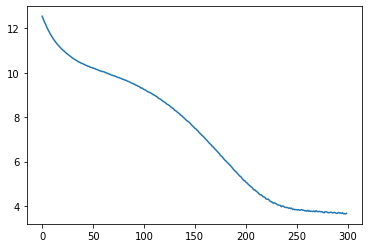

In [81]:
plt.plot(range(epoch),losses)

In [82]:
with torch.no_grad():
    
    y_val = model(cat_test,con_test)
    
    loss = torch.sqrt(criterion(y_val,y_test))

In [83]:
loss

tensor(3.6030)

In [85]:
for i in range(10):
    diff = np.abs(y_val[i].item() - y_test[i].item())
    print(f'{i}.) Predicted: {y_val[i].item():8.2f} True: {y_test[i].item():8.2f} Difference:{diff}')

0.) Predicted:     5.48 True:     2.90 Difference:2.575064182281494
1.) Predicted:    27.25 True:     5.70 Difference:21.54945468902588
2.) Predicted:     5.18 True:     7.70 Difference:2.520659923553467
3.) Predicted:    12.64 True:    12.50 Difference:0.14044189453125
4.) Predicted:     3.89 True:     4.10 Difference:0.21446681022644043
5.) Predicted:     5.21 True:     5.30 Difference:0.08743715286254883
6.) Predicted:     4.66 True:     3.70 Difference:0.961808443069458
7.) Predicted:    18.32 True:    14.50 Difference:3.816720962524414
8.) Predicted:     4.11 True:     5.70 Difference:1.5853915214538574
9.) Predicted:    12.21 True:    10.10 Difference:2.108509063720703


In [86]:
# saveing the model
torch.save(model.state_dict(), 'TaxiModel_sushant.pt')